# Semestrální práce Jakub Švec


1.) knihovny a cesta k souboru

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import numpy as np
import os

pd.options.display.max_columns = None

pracovni_adresar = os.getcwd()

# Název souboru CSV
nazev_souboru = 'semestralnidata.csv'  # Nahraďte 'nazevSouboru.csv' názvem vašeho souboru CSV

# Úplná cesta k souboru
dir = os.path.join(pracovni_adresar, nazev_souboru)

# Otevření souboru CSV pomocí pd.read_csv()
print(dir)
df = pd.read_csv(dir,sep=';',header=0)

c:\Users\sveck\Desktop\AnalyzeFolder\semestralnidata.csv


2.) Přejmenování

In [51]:

df = df.rename(columns={
    'iq': 'iq',
    'vyska_muzu':'meanHeightMale',
    'vyska_zen':'meanHeightFemale',
    'population':'pop2023',
    'nejlepsi_skoly_2021':'school_rank2021',
    'staty': 'country'
    })

3.) Nastavení typů

In [52]:
df['iq'] = df['iq'].astype(float)
df['vyska_muzu'] = df['meanHeightMale'].astype(float)
df['vyska_zen'] = df['meanHeightFemale'].astype(float)
df['nejlepsi_skoly_2021'] = df['school_rank2021'].astype(float)
df['population'] = df['school_rank2021'].astype(float)
df['staty'] = df['country'].astype('string')


4.) Vykreslení základního grafu

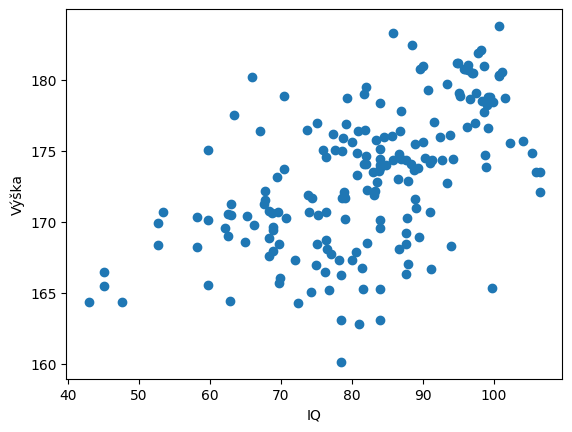

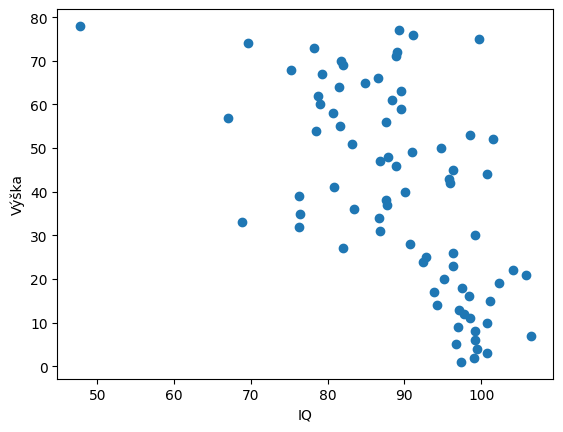

In [53]:
def showGraph(x,y):
    plt.scatter(x,y,marker='o')
    plt.xlabel("IQ")
    plt.ylabel("Výška")
    plt.show()

x = df['iq']
y_height = df['vyska_muzu']
y_school_rank = df['nejlepsi_skoly_2021']
weights = df['population']

showGraph(x,y_height)
showGraph(x,y_school_rank)


5.) metoda čtverců

Sklon:  0.20801140003151794
Posun:  156.0110065963185
Korelační koeficient:  0.552896942261995


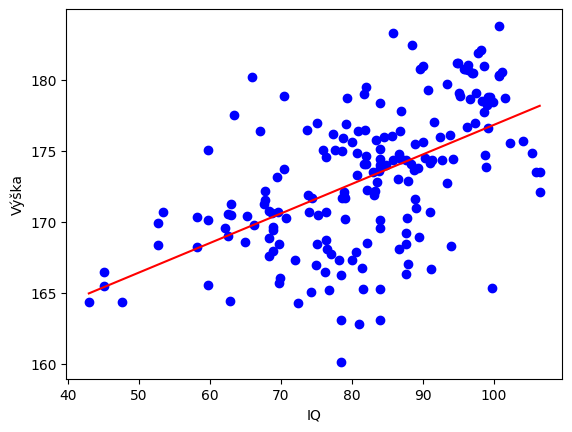

Sklon:  -1.3212448891277222
Posun:  158.0314022486454
Korelační koeficient:  -0.5991568049629845


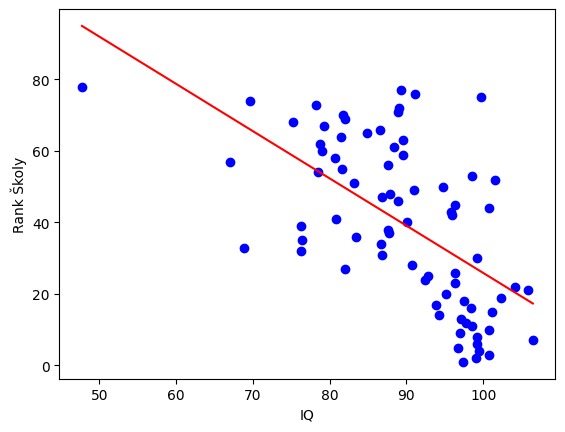

In [57]:
def regression(x,y,x_label,y_label):

    #Výpočet průměrných hodnot (iq a výška)
    valid_mask = ~np.isnan(x) & ~np.isnan(y)
    
    # Použití masky k výběru pouze nechybějících hodnot
    x = x[valid_mask]
    y = y[valid_mask]

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    #metoda čtverců
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    a = numerator / denominator
    b = y_mean - (a * x_mean)

    tmpY = a*x + b

    # Výpočet korelačního koeficientu
    correlation_coefficient = np.corrcoef(x, y)[0, 1]
    
    print('Sklon: ', a)
    print('Posun: ', b)
    print('Korelační koeficient: ', correlation_coefficient)

    # Vytvoření grafu s daty a regresní linií
    plt.scatter(x,y,color='blue', label='Data')
    plt.plot(x, tmpY, color='red', label='Regression Line')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

    
regression(x,y_height,"IQ","Výška")
regression(x,y_school_rank,"IQ","Rank Školy")

6.) Metoda čtverců vs lin regrese (Já vs knihovna)

Sklon lnR:  0.22783244952475867
Posun lnR:  154.34943698434807
Korelační koeficient lnR:  0.5955429048372364
Sklon:  0.20801140003151794
Posun:  156.0110065963185
Korelační koeficient:  0.552896942261995


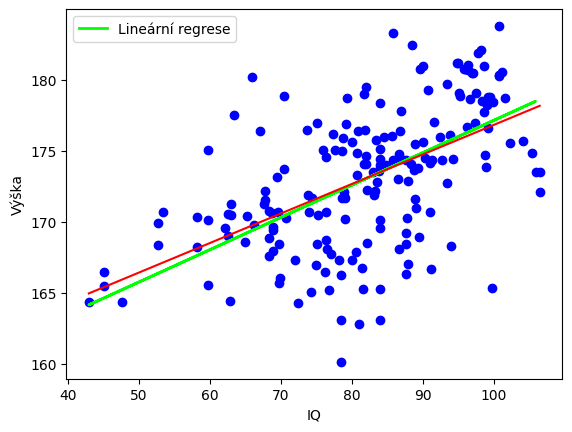

Sklon lnR:  -1.3212448891277226
Posun lnR:  158.03140224864543
Korelační koeficient lnR:  -0.5991568049629843
Sklon:  -1.3212448891277222
Posun:  158.0314022486454
Korelační koeficient:  -0.5991568049629845


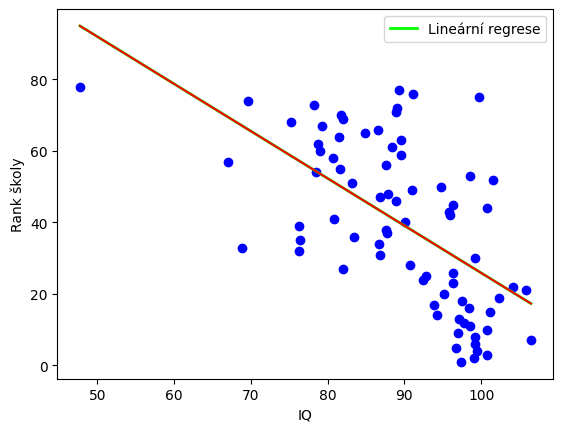

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y_height, test_size=0.2, random_state=60)

y = np.array(y_train)

valid_indexes = ~np.isnan(y)

y_train = y_train[valid_indexes]
X_train = X_train[valid_indexes]

def linearRegression(x, y,x_label,y_label):
    X = np.reshape(x, (-1, 1))
    y = np.array(y)

    # Identifikace indexů ne-NaN hodnot
    valid_indexes = ~np.isnan(y)

    X_valid = X[valid_indexes]
    y_valid = y[valid_indexes]

    regressor = LinearRegression()
    regressor.fit(X_valid, y_valid)


    # Výpis koeficientů
    print('Sklon lnR: ', regressor.coef_[0])
    print('Posun lnR: ', regressor.intercept_)
    correlation_coefficient, _ = pearsonr(X_valid.flatten(), y_valid)
    print('Korelační koeficient lnR: ', correlation_coefficient)

    # Vytvoření grafu s daty a regresní linií
    #plt.scatter(X_valid, y_valid, color='blue', label='Data')
    plt.plot(X_valid, regressor.predict(X_valid), color='lime', linewidth=2, label='Lineární regrese')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    return regressor.predict(X)

y_pred = linearRegression(X_train,y_train,"IQ","Výška")
regression(x,y_height,"IQ","Výška")
linearRegression(x,y_school_rank,"IQ","Rank školy")
regression(x,y_school_rank,"IQ","Rank školy")


7.) Výpočet kovariace s váhou (podle populace)

In [59]:
def weighted_correlation(x, y, weights):
    # Vážené sumy
    weighted_x = np.sum(weights * x)
    weighted_y = np.sum(weights * y)
    weighted_sum = np.sum(weights)
    
    # Vážený průměr
    mean_x = weighted_x / weighted_sum
    mean_y = weighted_y / weighted_sum
    
    # Vážené rozdíly
    weighted_diff_x = x - mean_x
    weighted_diff_y = y - mean_y
    
    # Vážené směrodatné odchylky
    weighted_std_x = np.sqrt(np.sum(weights * weighted_diff_x**2) / weighted_sum)
    weighted_std_y = np.sqrt(np.sum(weights * weighted_diff_y**2) / weighted_sum)
    
    # Vážený kovarianční koeficient
    weighted_cov = np.sum(weights * weighted_diff_x * weighted_diff_y) / weighted_sum
    
    # Vážený korelační koeficient
    weighted_correlation = weighted_cov / (weighted_std_x * weighted_std_y)
    
    return weighted_correlation

correlation = np.corrcoef(X_train,y_train)[0,1]
print("Korelační koeficient:", correlation)

correlation = weighted_correlation(X_train,y_train,weights)
print("Vážený korelační koeficient:", correlation)

correlation = weighted_correlation(x,y_school_rank,weights)
print("Korelační koeficient:", correlation)


Korelační koeficient: 0.5955429048372367
Vážený korelační koeficient: 0.8333436039463417
Korelační koeficient: -0.4375081738606026


8.) Pokus o kauzalitu

alpha: 154.9393927535073
beta0: 0.22886627586157285
beta1: -0.008991424047655378


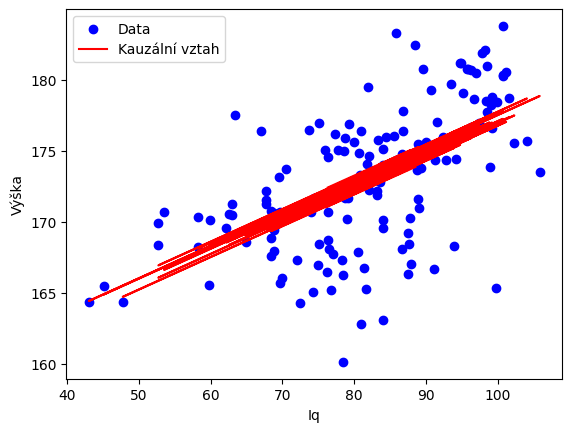

In [34]:
P = X_train  # První příčinná proměnná
K = []  # Druhá příčinná proměnná
Fn =y_train  # Závislá proměnná
y_prediction = y_pred

for i in range(len(Fn)):
        K.append(i)

Fn = np.array(Fn)
P = np.array(P)
K = np.array(K)

# Vytvoření design matrix
X = np.column_stack((np.ones(len(P)), P, K))

# Vytvoření instance lineární regrese
regressor = LinearRegression()

# Trénování modelu
regressor.fit(X, Fn)

# Výpis koeficientů
alpha = regressor.intercept_
beta0, beta1 = regressor.coef_[1], regressor.coef_[2]
epsilon = Fn - y_prediction

# Výpis výsledků
print('alpha:', alpha)
print('beta0:', beta0)
print('beta1:', beta1)

# Vytvoření grafu s daty a kauzálním vztahem
plt.scatter(P, Fn, color='blue', label='Data')
plt.plot(P, alpha + beta0*P + beta1*K, color='red', label='Kauzální vztah')
plt.xlabel('Iq')
plt.ylabel('Výška')
plt.legend()
plt.show()